In [1]:
#ISupport Vector Machine 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error 

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv('Scaled_BreastCancer_Data.csv')
dataset

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0.0
565,565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0.0
566,566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0.0
567,567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0.0


In [3]:
#dataset=pd.read_csv('breast-cancer.csv')

In [4]:
#d#ataset.head()

In [5]:

#sns.pairplot(dataset , hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','radius_worst', 'perimeter_worst' ])

In [6]:
#let's drop the diagnosis and id to define data feature 
X=dataset.drop(['Target'], axis=1)
X.head()

,Unnamed: 0,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
X=dataset.drop(['Target'], axis=1)

In [8]:
#dataset['T'] = dataset['diagnosis'].map({'M': 0, 'B': 1}).astype(float)

In [9]:
y=dataset['Target']
y.tail()

564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: Target, dtype: float64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
sc= StandardScaler().fit(X_train)  #scaling the training data or else the accuracy will be low. scaling brings the classses/data points together which makes it easier to separate, hence higher accuracy

In [12]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
clf_svm = svm.SVC(kernel='rbf',C=2.5,gamma='auto')
clf_svm.fit(X_train_std,y_train) #I used linear kernle prior to rbf and resulted in 96% accuracy. 

SVC(C=0.5, gamma='auto')

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
y

In [35]:
y_test_pred = clf_svm.predict(X_test_std)

In [36]:
y_test_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.])

In [37]:
y_test

512    0.0
457    1.0
439    1.0
298    1.0
37     1.0
      ... 
213    0.0
519    1.0
432    0.0
516    0.0
500    1.0
Name: Target, Length: 114, dtype: float64

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:


#confusion_matrix(y_test,y_test_pred)

In [40]:
accuracy_score(y_test,y_test_pred)*100

95.6140350877193

In [41]:
from sklearn.model_selection import GridSearchCV #how do we know which c value to select at start? we don't, so we need to do a GridSeach to check for the optimal c value 

In [42]:
prams = {'C':(0.001,0.005,0.01,2.5,0.08,0.1,0.5,1,2.5,4.5,5,5.5,7,7,8,9,10,30,40,50,100,500,1000)}

In [43]:
clf_svm_l = svm.SVC(kernel='rbf')

In [44]:
svm_grid_lin= GridSearchCV(clf_svm_l,prams,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')

In [45]:
svm_grid_lin.fit(X_train_std,y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 2.5, 0.08, 0.1, 0.5, 1, 2.5,
                               4.5, 5, 5.5, 7, 7, 8, 9, 10, 30, 40, 50, 100,
                               500, 1000)},
             scoring='accuracy', verbose=1)

In [46]:
svm_grid_lin.best_params_

{'C': 0.5}

In [47]:
linsvm_clf = svm_grid_lin.best_estimator_

In [48]:
accuracy_score(y_test,linsvm_clf.predict(X_test_std))*100 #note that accuracy changed

95.6140350877193

In [49]:
#confusion_matrix 

from sklearn.metrics import confusion_matrix 
import seaborn as sns

cm=confusion_matrix(y_test,y_test_pred)

<AxesSubplot:>

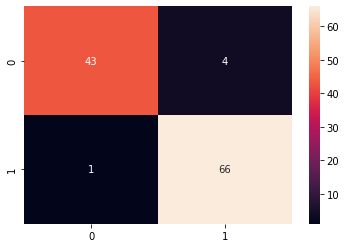

In [50]:
sns.heatmap(cm,annot=True,fmt='g')